/Users/msaharan/products/anaconda3/envs/pyfin/lib/python3.13/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/Users/msaharan/products/anaconda3/envs/pyfin/lib/python3.13/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/Users/msaharan/products/anaconda3/envs/pyfin/lib/python3.13/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "taiutc" yielded 2191 of "dubious year (Note 4)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/Users/msaharan/products/anaconda3/envs/pyfin/lib/python3.13/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utctai" yielded 2191 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/Users/msaharan/products/anaconda3/envs/pyfin/lib/python3.13/si

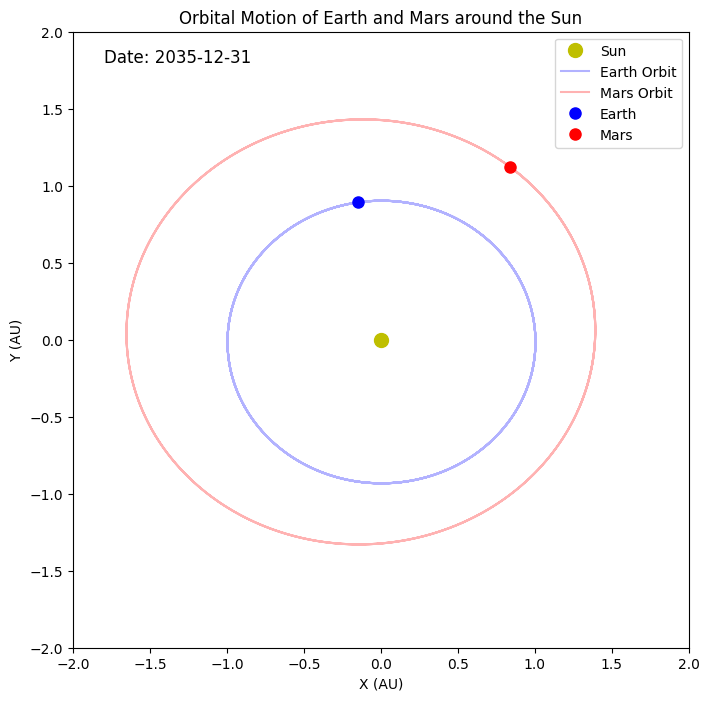

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import astropy.units as u
from astropy.time import Time
from astropy.coordinates import get_body_barycentric, solar_system_ephemeris

# Generate daily times
start_time = Time('2030-01-01')
end_time = Time('2035-12-31')
num_days = int((end_time - start_time).jd) + 1  # Including both start and end
times = start_time + np.linspace(0, (end_time - start_time).jd, num_days) * u.day

# Compute heliocentric positions
with solar_system_ephemeris.set('builtin'):
    sun_pos = get_body_barycentric('sun', times)
    earth_pos = get_body_barycentric('earth', times) - sun_pos
    mars_pos = get_body_barycentric('mars', times) - sun_pos

# Extract x and y coordinates in AU (projecting to xy-plane for 2D animation)
earth_x = earth_pos.xyz[0].to(u.au).value
earth_y = earth_pos.xyz[1].to(u.au).value
mars_x = mars_pos.xyz[0].to(u.au).value
mars_y = mars_pos.xyz[1].to(u.au).value

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_aspect('equal')
ax.set_title('Orbital Motion of Earth and Mars around the Sun')
ax.set_xlabel('X (AU)')
ax.set_ylabel('Y (AU)')

# Plot the Sun at the center
sun = ax.plot(0, 0, 'yo', markersize=10, label='Sun')[0]

# Initialize lines for Earth and Mars orbits (full paths for reference)
earth_orbit, = ax.plot(earth_x, earth_y, 'b-', alpha=0.3, label='Earth Orbit')
mars_orbit, = ax.plot(mars_x, mars_y, 'r-', alpha=0.3, label='Mars Orbit')

# Initialize points for current positions
earth_point, = ax.plot([], [], 'bo', markersize=8, label='Earth')
mars_point, = ax.plot([], [], 'ro', markersize=8, label='Mars')

# Date text
date_text = ax.text(0.05, 0.95, '', transform=ax.transAxes, fontsize=12)

ax.legend(loc='upper right')

def init():
    earth_point.set_data([], [])
    mars_point.set_data([], [])
    date_text.set_text('')
    return earth_point, mars_point, date_text

def animate(i):
    earth_point.set_data([earth_x[i]], [earth_y[i]])
    mars_point.set_data([mars_x[i]], [mars_y[i]])
    current_date = times[i].iso[:10]  # YYYY-MM-DD format
    date_text.set_text(f'Date: {current_date}')
    return earth_point, mars_point, date_text

# Create the animation
ani = FuncAnimation(fig, animate, frames=num_days, init_func=init, interval=20, blit=True)

# To display the animation in a Jupyter notebook or similar, use:
# from IPython.display import HTML
# HTML(ani.to_jshtml())

# To save as a GIF (requires imagemagick or ffmpeg installed)
ani.save(f'earth_mars_orbit_{start_time}_{end_time}.gif', writer='pillow', fps=30)

# If you want to show it interactively (in a script)
# plt.show()